## **Assignment - 7: Decision Tree & Ensemble** 
### ID: eo9232
### Name: Md Reza¶
### IE7860 - Winter 2022

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Exploratory Data Analysis**

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/diabetes.csv', header = 0)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **Data Preprocessing**

#### **Missing Value Imputation**

In [ ]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [ ]:
# Replace '0' with nan
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

In [ ]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [ ]:
# Replace nan with average value
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

## **Data Preperation**

#### **Target & Features Splits**

In [ ]:
# Scaled the dataset
from sklearn import preprocessing
df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled['Outcome'] = df['Outcome']
df = df_scaled
df.describe().loc[['mean', 'std','max'],].round(2).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.48
max,3.91,2.54,4.1,7.95,8.13,5.04,5.88,4.06,1.00


In [ ]:
from sklearn.preprocessing import StandardScaler
X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']

#### **Split the data set in a training set and a test set**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape

(614, 8)

In [ ]:
X_test.shape

(154, 8)

## **Building The Models**

### **Decision Tree**

In [ ]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 3)

In [ ]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

#### **Predict values using trained model**

In [ ]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

#### **Evaluate Model Performance**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

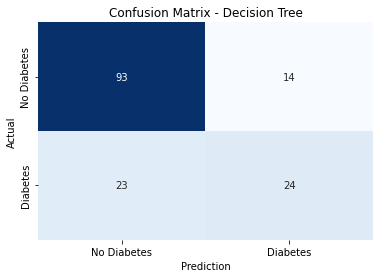

In [ ]:
# Results - Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot = True, xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'], cbar = False, cmap = 'Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix - Decision Tree")
plt.show()

In [ ]:
print('\x1b[1;03;30;1;95m'+'Accuracy Score:\x1b[1;94m', accuracy_score(y_test, y_test_pred))

Accuracy Score: 0.7597402597402597


#### **Plotting - Decision Tree**

In [ ]:
dot_data = tree.export_graphviz(clftree, out_file=None,feature_names= X_train.columns, filled = True)

In [ ]:
from IPython.display import Image

In [ ]:
import pydotplus

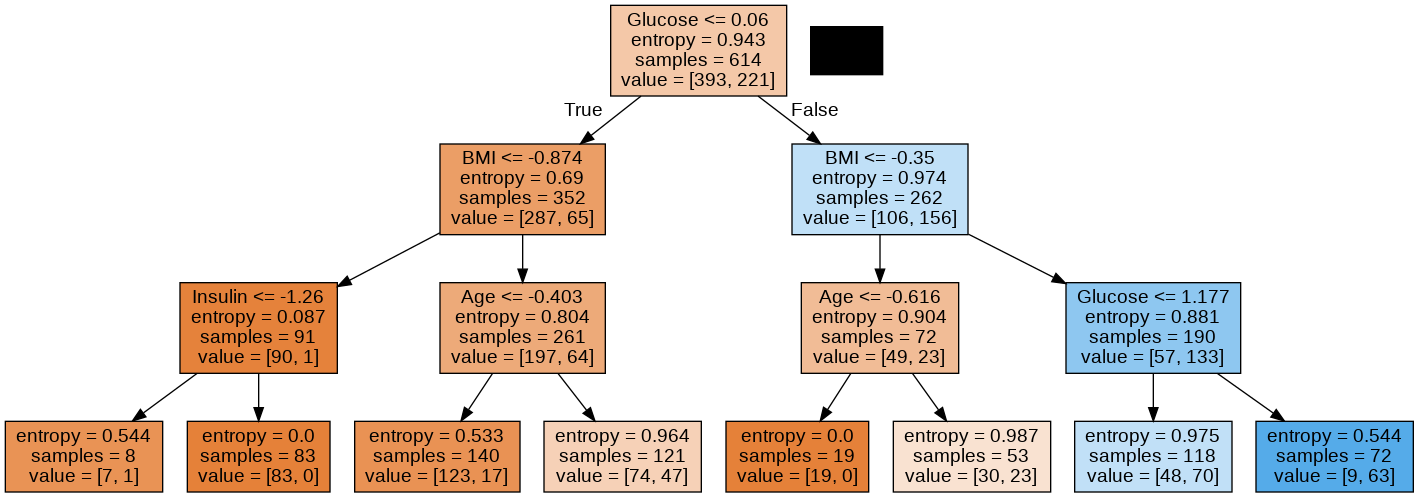

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#### **Prune The Tree**

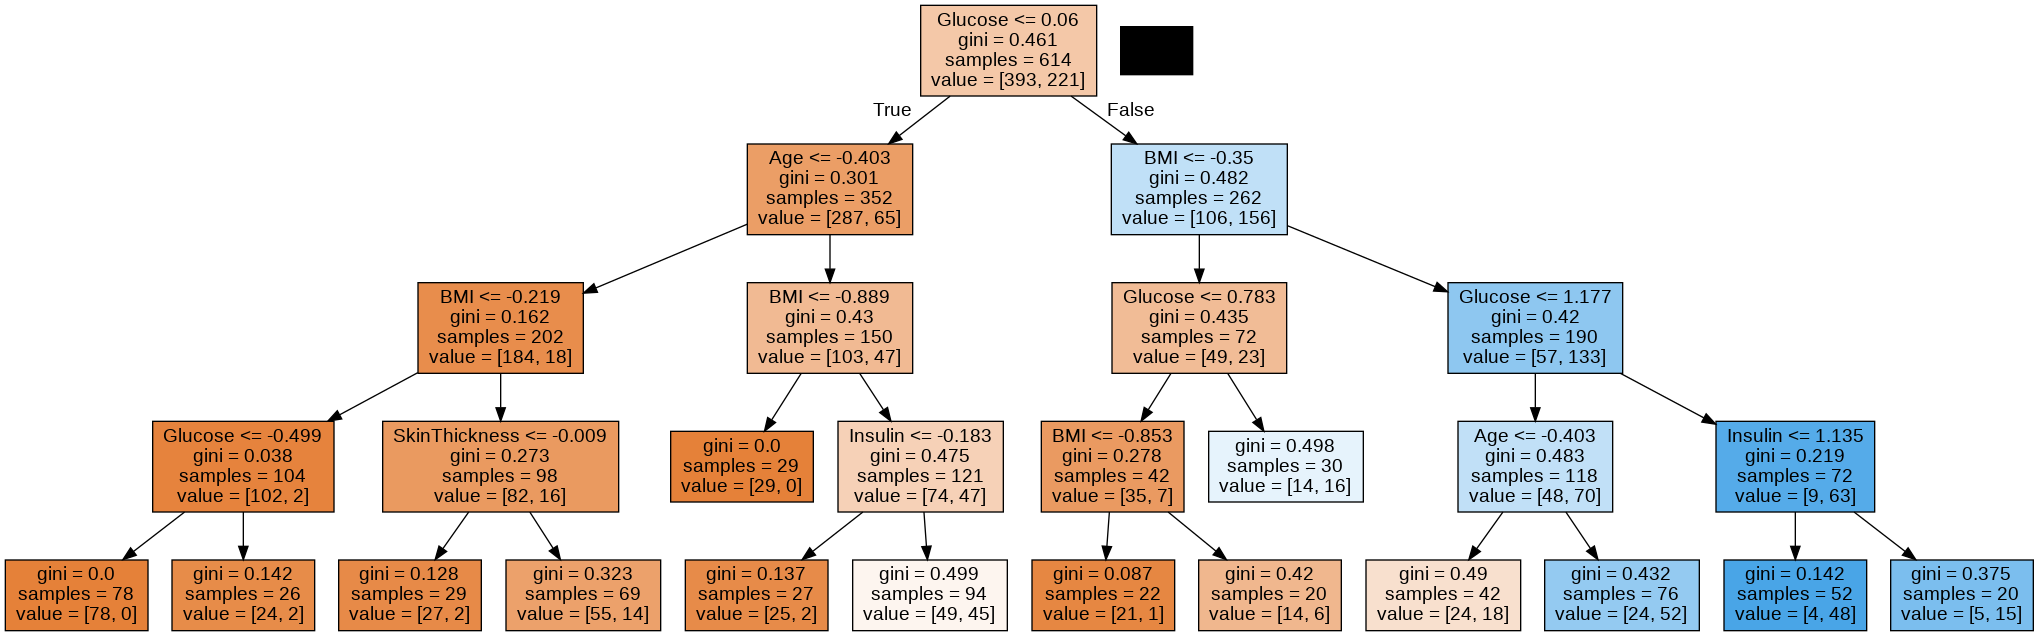

In [ ]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth=4)
clftree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(clftree2, out_file=None,feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [ ]:
acc = accuracy_score(y_test, clftree2.predict(X_test))
print('\x1b[1;03;30;1;95m'+'Accuracy Score:\x1b[1;94m', acc)

Accuracy Score: 0.7792207792207793


### **Bagging**

In [ ]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

#### **Evaluate Model Performance**

In [ ]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

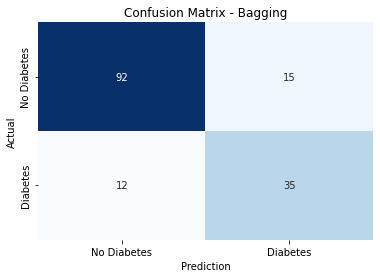

In [ ]:
# Results - Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, bag_clf.predict(X_test))
ax = sns.heatmap(c_matrix, annot = True, xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'], cbar = False, cmap = 'Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix - Bagging")
plt.show()

In [ ]:
bag_acc = accuracy_score(y_test, bag_clf.predict(X_test))
print('\x1b[1;03;30;1;95m'+'Accuracy Score:\x1b[1;94m', bag_acc)

Accuracy Score: 0.8246753246753247


### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)

#### **Evaluate Model Performance**

In [ ]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1)

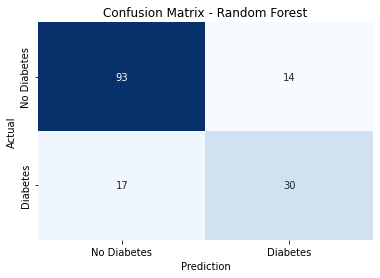

In [ ]:
# Results - Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, rf_clf.predict(X_test))
ax = sns.heatmap(c_matrix, annot = True, xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'], cbar = False, cmap = 'Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
rf_acc = accuracy_score(y_test, rf_clf.predict(X_test))
print('\x1b[1;03;30;1;95m'+'Accuracy Score:\x1b[1;94m', rf_acc)

Accuracy Score: 0.7987012987012987


### **Feature Importance Using CV Grid Search & Random Forest**


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Train and fit our model

randomForest3 = RandomForestClassifier(random_state = 0, n_jobs = -1)
n_estimators = [100, 200]
max_features = ['auto']
max_depth = [7]
min_samples_split = [14]
bootstrap = [False]
max_leaf_nodes = [600]


parameters = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'bootstrap': bootstrap,
             'max_leaf_nodes': max_leaf_nodes}

rf_grid_cv = GridSearchCV(randomForest3, parameters, cv = 10)

#### **Evaluate Model Performance**

In [ ]:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             param_grid={'bootstrap': [False], 'max_depth': [7],
                         'max_features': ['auto'], 'max_leaf_nodes': [600],
                         'min_samples_split': [14],
                         'n_estimators': [100, 200]})

In [ ]:
# Best parameter set
print('\x1b[1;03;30;1;95m' + 'Best parameters:\x1b[1;94m', rf_grid_cv.best_params_)

Best parameters: {'bootstrap': False, 'max_depth': 7, 'max_features': 'auto', 'max_leaf_nodes': 600, 'min_samples_split': 14, 'n_estimators': 100}


In [ ]:
cvrf_clf = rf_grid_cv.best_estimator_

In [ ]:
cvrf_acc = accuracy_score(y_test, cvrf_clf.predict(X_test))
print('\x1b[1;03;30;1;95m'+'Accuracy Score:\x1b[1;94m', cvrf_acc)

Accuracy Score: 0.8051948051948052


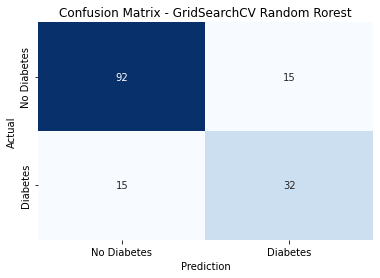

In [ ]:
# Results - Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, cvrf_clf.predict(X_test))
ax = sns.heatmap(c_matrix, annot = True, xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'], cbar = False, cmap = 'Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix - GridSearchCV Random Rorest")
plt.show()

### **XG Boost**

In [ ]:
import xgboost as xgb

In [ ]:
''' Prameter Tuning

1. General Parameters: Guide the overall functioning
2. Booster Parameters: Guide the individual booster (tree/regression) at each step
3. Learning Task Parameters: Guide the optimization performed '''

' Prameter Tuning\n\n1. General Parameters: Guide the overall functioning\n2. Booster Parameters: Guide the individual booster (tree/regression) at each step\n3. Learning Task Parameters: Guide the optimization performed '

In [ ]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,
                            n_jobs=-1)

In [ ]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(learning_rate=0.3, max_depth=5, n_estimators=10000, n_jobs=-1)

#### **Evaluate Model Performance**

In [ ]:
xgb_acc = accuracy_score(y_test, xgb_clf.predict(X_test))
print('\x1b[1;03;30;1;95m'+'Accuracy Score:\x1b[1;94m', xgb_acc)

Accuracy Score: 0.7792207792207793


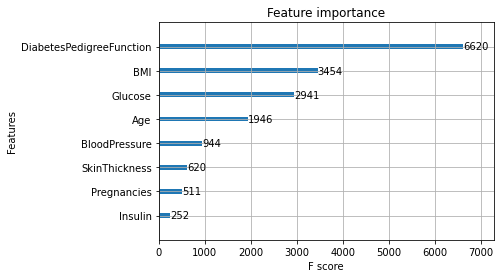

In [ ]:
plt = xgb.plot_importance(xgb_clf)

### **Feature Importance Using CV Grid Search & XGBoost**

In [ ]:
xgb_clf = xgb.XGBClassifier(n_estimators=250,learning_rate=0.1, random_state=42)

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
    'gamma' : [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[ 1e-2, 0.1, 1]
}

In [ ]:
grid_search = GridSearchCV(xgb_clf, param_test1,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(n_estimators=250, random_state=42),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [ ]:
cvxg_clf = grid_search.best_estimator_

In [ ]:
cvxgb_acc = accuracy_score(y_test, cvxg_clf.predict(X_test))
print('\x1b[1;03;30;1;95m'+'Accuracy Score:\x1b[1;94m', cvxgb_acc)

Accuracy Score: 0.8051948051948052


In [ ]:
# Best parameter set
print('\x1b[1;03;30;1;95m' + 'Best parameters:\x1b[1;94m', grid_search.best_params_)

Best parameters: {'colsample_bytree': 0.9, 'gamma': 0.2, 'max_depth': 5, 'reg_alpha': 0.1, 'subsample': 0.8}


## **Feature Importance Using Explainable AI (SHAP)**

In [ ]:
pip install shap

     |████████████████████████████████| 564 kB 5.4 MB/s 


#### **Compute SHAP values**

In [ ]:
import shap
rf_clf.fit(X_train, y_train)
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X)

#### **Mean SHAP Plot:** 
Mean SHAP calculates the mean of absolute SHAP values for each feature across all observations.

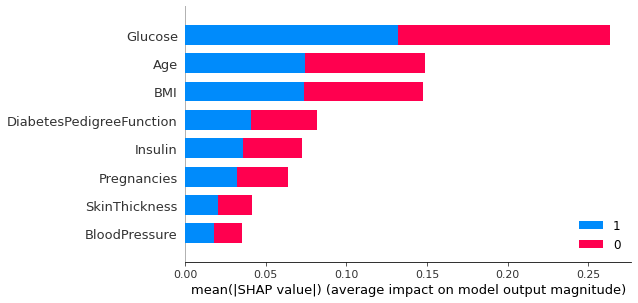

In [ ]:
shap.summary_plot(shap_values, X.values, plot_type="bar", class_names= y, feature_names = X.columns)

#### **SHAP Beeswarm Plot:** 
Combines feature importance with feature effects to highlight important relationships.

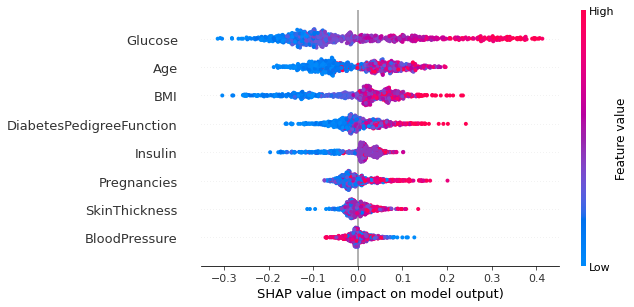

In [ ]:
shap.summary_plot(shap_values[1], X.values, feature_names = X.columns)

####**SHAP Dependence Plot:**
Shows the marginal effect of feature(s) on the predicted outcome of a machine learning model.

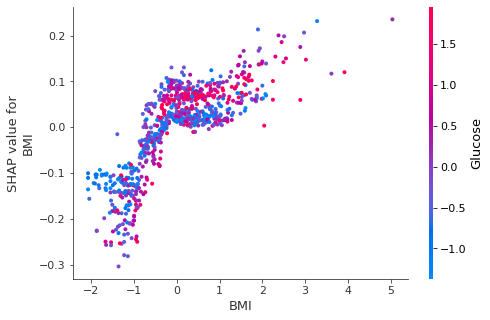

In [ ]:
shap.dependence_plot(5, shap_values[1], X.values, feature_names=X.columns)

#### **SHAP Force Plot:**

In [ ]:
shap.initjs()
i=8
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X.values[i], feature_names = X.columns)

#### **SHAP Waterfall Plot:** 


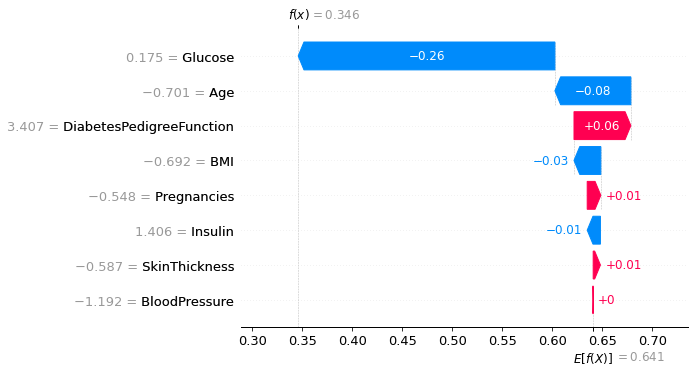

In [ ]:
shap.initjs()
row = 8
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[0], data=X_test.iloc[row],  
                                         feature_names=X_test.columns.tolist()))